In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


1. Develop a GRU-based encoder-decoder architecture for English to French Translation. Train the model on the entire dataset and evaluate it on the entire dataset. Report training loss, validation loss, and validation accuracy. Also, try some qualitative validation as well, asking the network to generate French translations for some English sentences.

Epoch 1/100, Train Loss: 3.5861, Val Loss: 2.7423, Val Accuracy: 0.0000
Epoch 11/100, Train Loss: 2.6158, Val Loss: 2.3635, Val Accuracy: 0.0000
Epoch 21/100, Train Loss: 1.8255, Val Loss: 1.5982, Val Accuracy: 0.0000
Epoch 31/100, Train Loss: 1.1107, Val Loss: 0.9014, Val Accuracy: 0.3766
Epoch 41/100, Train Loss: 0.3594, Val Loss: 0.3100, Val Accuracy: 0.8442
Epoch 51/100, Train Loss: 0.1373, Val Loss: 0.1217, Val Accuracy: 0.9351
Epoch 61/100, Train Loss: 0.0679, Val Loss: 0.0616, Val Accuracy: 1.0000
Epoch 71/100, Train Loss: 0.0442, Val Loss: 0.0415, Val Accuracy: 1.0000
Epoch 81/100, Train Loss: 0.0329, Val Loss: 0.0314, Val Accuracy: 1.0000
Epoch 91/100, Train Loss: 0.0262, Val Loss: 0.0252, Val Accuracy: 1.0000
Epoch 100/100, Train Loss: 0.0220, Val Loss: 0.0213, Val Accuracy: 1.0000


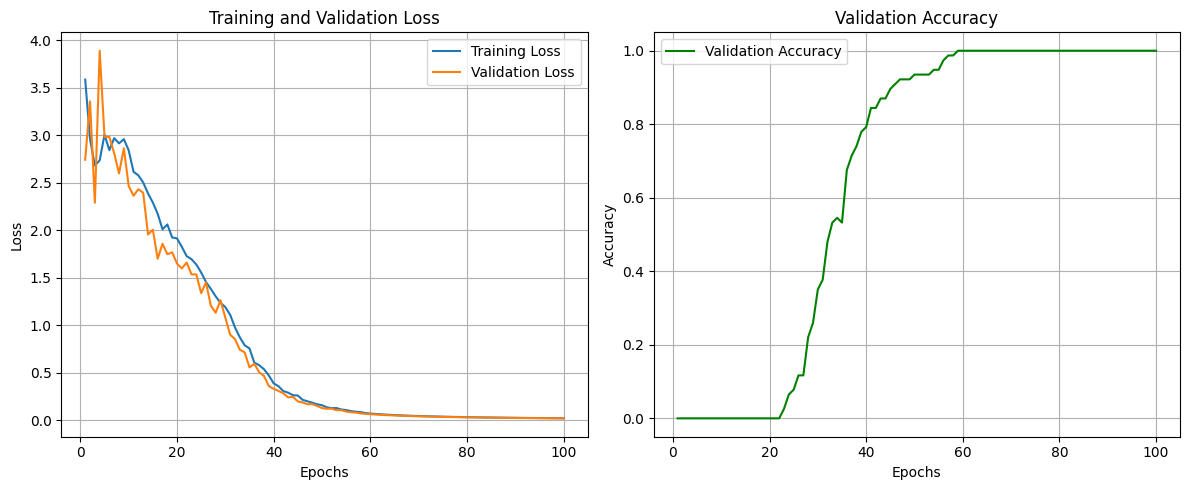


Final Validation Results:
Loss: 0.0213
Accuracy: 1.0000

Example translations:
Input: We travel by train, Target: Nous voyageons en train, Predicted: Nous voyageons en train
Input: We learn something new every day, Target: Nous apprenons quelque chose de nouveau chaque jour, Predicted: Nous apprenons quelque chose de nouveau chaque jour
Input: He climbs the mountain, Target: Il gravit la montagne, Predicted: Il gravit la montagne
Input: He listens to music while jogging, Target: Il écoute de la musique en faisant du jogging, Predicted: Il écoute de la musique en faisant du jogging
Input: She swims in the ocean, Target: Elle nage dans l'océan, Predicted: Elle nage dans l'océan
Evaluation Loss: 0.02131982873307383, Accuracy: 1.0


In [15]:
# Egnlish to French translation

# English to French translation dataset
english_to_french = [
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur")
]
     

# Special tokens for the start and end of sequences
SOS_token = 0  # Start Of Sequence Token
EOS_token = 1  # End Of Sequence Token

# Preparing the word to index mapping and vice versa
word_to_index = {"SOS": SOS_token, "EOS": EOS_token}
for pair in english_to_french:
    for word in pair[0].split() + pair[1].split():
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)

index_to_word = {i: word for word, i in word_to_index.items()}

class TranslationDataset(Dataset):
    """Custom Dataset class for handling translation pairs."""
    def __init__(self, dataset, word_to_index):
        self.dataset = dataset
        self.word_to_index = word_to_index

    def __len__(self):
        # Returns the total number of translation pairs in the dataset
        return len(self.dataset)

    def __getitem__(self, idx):
        # Retrieves a translation pair by index, converts words to indices,
        # and adds the EOS token at the end of each sentence.
        input_sentence, target_sentence = self.dataset[idx]
        input_indices = [self.word_to_index[word] for word in input_sentence.split()] + [EOS_token]
        target_indices = [self.word_to_index[word] for word in target_sentence.split()] + [EOS_token]
        return torch.tensor(input_indices, dtype=torch.long), torch.tensor(target_indices, dtype=torch.long)

# Creating a DataLoader to batch and shuffle the dataset
translation_dataset = TranslationDataset(english_to_french, word_to_index)
dataloader = DataLoader(translation_dataset, batch_size=1, shuffle=True)

class Encoder(nn.Module):
    """The Encoder part of the seq2seq model."""
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)  # GRU layer

    def forward(self, input, hidden):
        # Forward pass for the encoder
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        # Initializes hidden state
        return torch.zeros(1, 1, self.hidden_size, device=device)

class Decoder(nn.Module):
    """The Decoder part of the seq2seq model."""
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)  # GRU layer
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Assuming all words in the dataset + 'SOS' and 'EOS' tokens are included in word_to_index
input_size = len(word_to_index)
hidden_size = 256  # Adjust according to your preference
output_size = len(word_to_index)

encoder = Encoder(input_size=input_size, hidden_size=hidden_size).to(device)
decoder = Decoder(hidden_size=hidden_size, output_size=output_size).to(device)

# Set the learning rate for optimization
learning_rate = 0.008

# Initializing optimizers for both encoder and decoder with Adam optimizer
encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion):
    # Initialize encoder hidden state
    encoder_hidden = encoder.initHidden()

    # Clear gradients for optimizers
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Calculate the length of input and target tensors
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # Initialize loss
    loss = 0

    # Encoding each word in the input
    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)

    # Decoder's first input is the SOS token
    decoder_input = torch.tensor([[SOS_token]], device=device)

    # Decoder starts with the encoder's last hidden state
    decoder_hidden = encoder_hidden

    # Decoding loop
    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        # Choose top1 word from decoder's output
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()  # Detach from history as input

        # Calculate loss
        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:  # Stop if EOS token is generated
            break

    # Backpropagation
    loss.backward()

    # Update encoder and decoder parameters
    encoder_optimizer.step()
    decoder_optimizer.step()

    # Return average loss
    return loss.item() / target_length

# Negative Log Likelihood Loss function for calculating loss
criterion = nn.NLLLoss()

# Set number of epochs for training
n_epochs = 50

# Lists to store training and validation metrics
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
for epoch in range(n_epochs):
    # Training phase
    encoder.train()
    decoder.train()
    total_train_loss = 0
    
    for input_tensor, target_tensor in dataloader:
        # Move tensors to the correct device
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)

        # Perform a single training step and update total loss
        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        total_train_loss += loss
    
    # Calculate average training loss for this epoch
    avg_train_loss = total_train_loss / len(dataloader)
    train_losses.append(avg_train_loss)
    
    # Validation phase - using the same dataset
    encoder.eval()
    decoder.eval()
    total_val_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:  # Using the same dataloader
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)
            
            # Initialize encoder hidden state
            encoder_hidden = encoder.initHidden()
            
            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)
            
            # Encoding step
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
            
            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden
            
            loss = 0
            predicted_indices = []
            
            for di in range(target_length):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()
                
                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break
            
            # Calculate validation loss
            total_val_loss += loss.item() / target_length
            
            # Check if prediction is correct (exact match)
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1
    
    # Calculate average validation loss and accuracy for this epoch
    avg_val_loss = total_val_loss / len(dataloader)
    val_losses.append(avg_val_loss)
    
    val_accuracy = correct_predictions / len(dataloader)
    val_accuracies.append(val_accuracy)
    
    # Print metrics every 10 epochs
    if epoch % 10 == 0 or epoch == n_epochs:
        print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

def evaluate_and_show_examples(encoder, decoder, dataloader, criterion, n_examples=10):
    # Switch model to evaluation mode
    encoder.eval()
    decoder.eval()

    total_loss = 0
    correct_predictions = 0

    # No gradient calculation
    with torch.no_grad():
        for i, (input_tensor, target_tensor) in enumerate(dataloader):
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)

            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            loss = 0

            # Encoding step
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)

            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden

            predicted_indices = []

            for di in range(target_length):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()

                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            # Calculate and print loss and accuracy for the evaluation
            total_loss += loss.item() / target_length
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1

            # Optionally, print some examples
            if i < n_examples:
                predicted_sentence = ' '.join([index_to_word[index] for index in predicted_indices if index not in (SOS_token, EOS_token)])
                target_sentence = ' '.join([index_to_word[index.item()] for index in target_tensor if index.item() not in (SOS_token, EOS_token)])
                input_sentence = ' '.join([index_to_word[index.item()] for index in input_tensor if index.item() not in (SOS_token, EOS_token)])

                print(f'Input: {input_sentence}, Target: {target_sentence}, Predicted: {predicted_sentence}')

        # Print overall evaluation results
        average_loss = total_loss / len(dataloader)
        accuracy = correct_predictions / len(dataloader)
        print(f'Evaluation Loss: {average_loss}, Accuracy: {accuracy}')

# Visualize training and validation loss
plt.figure(figsize=(12, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, n_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('english2french_training_metrics.png')
plt.show()

# Print final validation metrics
final_val_loss = val_losses[-1]
final_val_accuracy = val_accuracies[-1]
print(f'\nFinal Validation Results:')
print(f'Loss: {final_val_loss:.4f}')
print(f'Accuracy: {final_val_accuracy:.4f}')

# Perform evaluation with examples
print(f'\nExample translations:')
evaluate_and_show_examples(encoder, decoder, dataloader, criterion, n_examples=5)
     


2. Repeat problem 1, this time extend the network with attention. Train the model on the entire dataset and evaluate it on the entire dataset. Report training loss, validation loss, and validation accuracy. Also, try some qualitative validation as well, asking the network to generate French translations for some English sentences. Also, compare the results against problem 1.


Epoch 0, Train Loss: 4.012242697715956, Val Loss: 3.6011329541081514, Val Accuracy: 0.0
Epoch 10, Train Loss: 2.6896720134162626, Val Loss: 2.3780634538484975, Val Accuracy: 0.0
Epoch 20, Train Loss: 1.7614242441628158, Val Loss: 1.4488579710594918, Val Accuracy: 0.0
Epoch 30, Train Loss: 0.7992675080640467, Val Loss: 0.6999485198074309, Val Accuracy: 0.5974025974025974
Epoch 40, Train Loss: 0.19865739970041585, Val Loss: 0.1772717151272496, Val Accuracy: 0.922077922077922
Epoch 50, Train Loss: 0.08811656673654064, Val Loss: 0.0773718844760548, Val Accuracy: 0.987012987012987
Epoch 60, Train Loss: 0.046905219927353366, Val Loss: 0.04201678347485296, Val Accuracy: 1.0
Epoch 70, Train Loss: 0.03215266778194285, Val Loss: 0.0291161939063267, Val Accuracy: 1.0
Epoch 80, Train Loss: 0.024113073909681704, Val Loss: 0.022183077398574717, Val Accuracy: 1.0
Epoch 90, Train Loss: 0.019228979608823884, Val Loss: 0.01787670592321849, Val Accuracy: 1.0


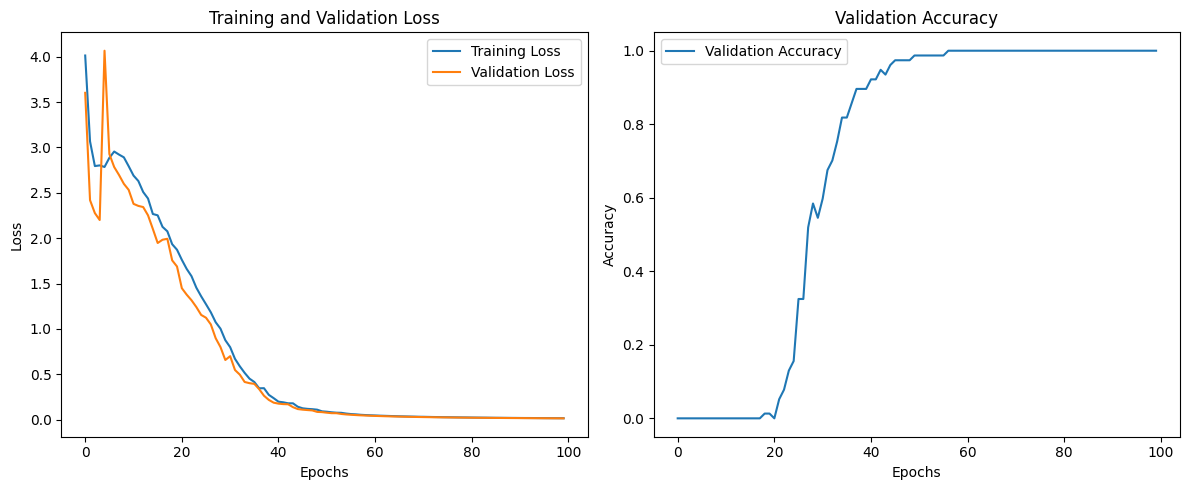


Final Validation Loss: 0.0152
Final Validation Accuracy: 1.0000 (100.00%)

Example translations:
Input: She runs in the park, Target: Elle court dans le parc, Predicted: Elle court dans le parc
Input: She dances gracefully, Target: Elle danse avec grâce, Predicted: Elle danse avec grâce
Input: He enjoys reading books, Target: Il aime lire des livres, Predicted: Il aime lire des livres
Input: He sings in the choir, Target: Il chante dans le chœur, Predicted: Il chante dans le chœur
Input: We plant flowers in the garden, Target: Nous plantons des fleurs dans le jardin, Predicted: Nous plantons des fleurs dans le jardin
Input: The baby cries, Target: Le bébé pleure, Predicted: Le bébé pleure
Input: He climbs the mountain, Target: Il gravit la montagne, Predicted: Il gravit la montagne
Input: He works hard every day, Target: Il travaille dur tous les jours, Predicted: Il travaille dur tous les jours
Input: They study French grammar, Target: Ils étudient la grammaire française, Predicted: 

In [16]:
# English to French translation with attention.

class TranslationDataset(Dataset):
    """Custom Dataset class for handling translation pairs."""
    def __init__(self, dataset, word_to_index):
        self.dataset = dataset
        self.word_to_index = word_to_index

    def __len__(self):
        # Returns the total number of translation pairs in the dataset
        return len(self.dataset)

    def __getitem__(self, idx):
        # Retrieves a translation pair by index, converts words to indices,
        # and adds the EOS token at the end of each sentence.
        input_sentence, target_sentence = self.dataset[idx]
        input_indices = [self.word_to_index[word] for word in input_sentence.split()] + [EOS_token]
        target_indices = [self.word_to_index[word] for word in target_sentence.split()] + [EOS_token]
        return torch.tensor(input_indices, dtype=torch.long), torch.tensor(target_indices, dtype=torch.long)

# Creating a DataLoader to batch and shuffle the dataset
max_length = 14
translation_dataset = TranslationDataset(english_to_french, word_to_index)
dataloader = DataLoader(translation_dataset, batch_size=1, shuffle=True)

class Encoder(nn.Module):
    """The Encoder part of the seq2seq model."""
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)  # GRU layer

    def forward(self, input, hidden):
        # Forward pass for the encoder
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        # Initializes hidden state
        return torch.zeros(1, 1, self.hidden_size, device=device)

class AttentionDecoder(nn.Module):
    """The Decoder part of the seq2seq model with attention mechanism."""
    def __init__(self, hidden_size, output_size, max_length=14, dropout_p=0.1):
        super(AttentionDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length
        self.embedding = nn.Embedding(self.output_size, self.hidden_size)  # Embedding layer
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)  # Attention layer
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)  # Combining layer
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)  # GRU layer
        self.out = nn.Linear(self.hidden_size, output_size)  # Output layer

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        # Calculating attention weights
        attn_weights = torch.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        # Combining embedded input with attention output
        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = torch.relu(output)
        output, hidden = self.gru(output, hidden)

        output = torch.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Assuming all words in the dataset + 'SOS' and 'EOS' tokens are included in word_to_index
input_size = len(word_to_index)
hidden_size = 256  # Adjust according to your preference
output_size = len(word_to_index)

encoder = Encoder(input_size=input_size, hidden_size=hidden_size).to(device)
decoder = AttentionDecoder(hidden_size=hidden_size, output_size=output_size).to(device)

# Set the learning rate for optimization
learning_rate = 0.008

# Initializing optimizers for both encoder and decoder with Adam optimizer
encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=14):
    # Initialize encoder hidden state
    encoder_hidden = encoder.initHidden()

    # Clear gradients for optimizers
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Calculate the length of input and target tensors
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # Initialize loss
    loss = 0

    # Encoding each word in the input
    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)
    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    # Decoder's first input is the SOS token
    decoder_input = torch.tensor([[SOS_token]], device=device)

    # Decoder starts with the encoder's last hidden state
    decoder_hidden = encoder_hidden

    # Decoding loop with attention
    for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
        # Choose top1 word from decoder's output
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()  # Detach from history as input

        # Calculate loss
        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:  # Stop if EOS token is generated
            break

    # Backpropagation
    loss.backward()

    # Update encoder and decoder parameters
    encoder_optimizer.step()
    decoder_optimizer.step()

    # Return average loss
    return loss.item() / target_length

# Negative Log Likelihood Loss function for calculating loss
criterion = nn.NLLLoss()

def evaluate(encoder, decoder, dataloader, criterion):
    # Switch model to evaluation mode
    encoder.eval()
    decoder.eval()

    total_loss = 0
    correct_predictions = 0

    # No gradient calculation
    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)

            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            loss = 0

            # Encoding step
            encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
                encoder_outputs[ei] = encoder_output[0, 0]

            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden

            predicted_indices = []

            for di in range(target_length):
                decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()

                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            # Calculate loss and check if prediction is correct
            total_loss += loss.item() / target_length
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1

        # Calculate average loss and accuracy
        average_loss = total_loss / len(dataloader)
        accuracy = correct_predictions / len(dataloader)
        
        return average_loss, accuracy

# Set number of epochs for training
n_epochs = 50

# Lists to store training and validation losses
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
for epoch in range(n_epochs):
    # Set models to training mode
    encoder.train()
    decoder.train()
    
    total_loss = 0
    for input_tensor, target_tensor in dataloader:
        # Move tensors to the correct device
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)

        # Perform a single training step and update total loss
        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        total_loss += loss
    
    # Calculate average training loss for this epoch
    avg_train_loss = total_loss / len(dataloader)
    train_losses.append(avg_train_loss)
    
    # Evaluate on validation set (using the same data for simplicity)
    val_loss, val_accuracy = evaluate(encoder, decoder, dataloader, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    # Print loss every 10 epochs
    if epoch % 10 == 0:
       print(f'Epoch {epoch}, Train Loss: {avg_train_loss}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}')



def evaluate_and_show_examples(encoder, decoder, dataloader, criterion, n_examples=10):
    # Switch model to evaluation mode
    encoder.eval()
    decoder.eval()

    total_loss = 0
    correct_predictions = 0

    # No gradient calculation
    with torch.no_grad():
        for i, (input_tensor, target_tensor) in enumerate(dataloader):
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)

            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            loss = 0

            # Encoding step
            encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
                encoder_outputs[ei] = encoder_output[0, 0]

            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden

            predicted_indices = []

            for di in range(target_length):
                decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()

                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            # Calculate and print loss and accuracy for the evaluation
            total_loss += loss.item() / target_length
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1

            # Optionally, print some examples
            if i < n_examples:
                predicted_sentence = ' '.join([index_to_word[index] for index in predicted_indices if index not in (SOS_token, EOS_token)])
                target_sentence = ' '.join([index_to_word[index.item()] for index in target_tensor if index.item() not in (SOS_token, EOS_token)])
                input_sentence = ' '.join([index_to_word[index.item()] for index in input_tensor if index.item() not in (SOS_token, EOS_token)])

                print(f'Input: {input_sentence}, Target: {target_sentence}, Predicted: {predicted_sentence}')

        # Print overall evaluation results
        average_loss = total_loss / len(dataloader)
        accuracy = correct_predictions / len(dataloader)
        print(f'Evaluation Loss: {average_loss}, Accuracy: {accuracy}')

# Visualize training and validation loss
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_validation_metrics.png')
plt.show()

# Report final validation accuracy
final_val_loss, final_val_accuracy = val_losses[-1], val_accuracies[-1]
print(f'\nFinal Validation Loss: {final_val_loss:.4f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.4f} ({final_val_accuracy*100:.2f}%)')

# Perform evaluation with examples
print('\nExample translations:')
evaluate_and_show_examples(encoder, decoder, dataloader, criterion)

3. Repeat problems 1 and 2, this time try to translate from French to English. Train the model on the entire dataset and evaluate it on the entire dataset. Report training loss, validation loss, and validation accuracy. Also, try some qualitative validation as well, asking the network to generate English  translations for some French sentences. Which one seems to be more effective, French-to-English or English-to-French?


Epoch 0, Train Loss: 4.0611, Val Loss: 3.3963, Val Accuracy: 0.0000
Epoch 10, Train Loss: 2.7891, Val Loss: 2.8246, Val Accuracy: 0.0000
Epoch 20, Train Loss: 1.8587, Val Loss: 1.6686, Val Accuracy: 0.0130
Epoch 30, Train Loss: 0.9503, Val Loss: 0.7784, Val Accuracy: 0.5325
Epoch 40, Train Loss: 0.2643, Val Loss: 0.2146, Val Accuracy: 0.9481
Epoch 50, Train Loss: 0.1007, Val Loss: 0.0882, Val Accuracy: 1.0000
Epoch 60, Train Loss: 0.0580, Val Loss: 0.0534, Val Accuracy: 1.0000
Epoch 70, Train Loss: 0.0401, Val Loss: 0.0378, Val Accuracy: 1.0000
Epoch 80, Train Loss: 0.0305, Val Loss: 0.0291, Val Accuracy: 1.0000
Epoch 90, Train Loss: 0.0244, Val Loss: 0.0235, Val Accuracy: 1.0000
Epoch 99, Train Loss: 0.0207, Val Loss: 0.0201, Val Accuracy: 1.0000

Final Validation Accuracy: 1.0000


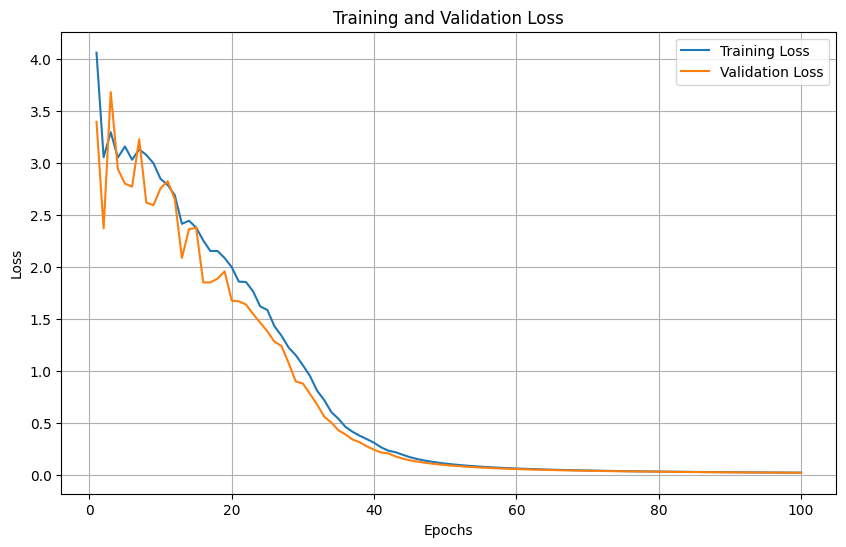

Input: L'horloge tic-tac bruyamment, Target: The clock ticks loudly, Predicted: The clock ticks loudly
Input: Nous regardons un film ensemble, Target: We watch a movie together, Predicted: We watch a movie together
Input: Les enfants jouent dans le parc, Target: The children play in the park, Predicted: The children play in the park
Input: Il écoute de la musique en faisant du jogging, Target: He listens to music while jogging, Predicted: He listens to music while jogging
Input: Il a faim, Target: He is hungry, Predicted: He is hungry
Input: Elle chante une chanson, Target: She sings a song, Predicted: She sings a song
Input: Ils jouent au football chaque week-end, Target: They play soccer every weekend, Predicted: They play soccer every weekend
Input: Nous célébrons les anniversaires avec un gâteau, Target: We celebrate birthdays with cake, Predicted: We celebrate birthdays with cake
Input: Le chien aboie bruyamment, Target: The dog barks loudly, Predicted: The dog barks loudly
Input:

In [17]:
#French to English

# French to English translation dataset
french_to_english = [
    ("J'ai froid", "I am cold"),
    ("Tu es fatigué", "You are tired"),
    ("Il a faim", "He is hungry"),
    ("Elle est heureuse", "She is happy"),
    ("Nous sommes amis", "We are friends"),
    ("Ils sont étudiants", "They are students"),
    ("Le chat dort", "The cat is sleeping"),
    ("Le soleil brille", "The sun is shining"),
    ("Nous aimons la musique", "We love music"),
    ("Elle parle français couramment", "She speaks French fluently"),
    ("Il aime lire des livres", "He enjoys reading books"),
    ("Ils jouent au football chaque week-end", "They play soccer every weekend"),
    ("Le film commence à 19 heures", "The movie starts at 7 PM"),
    ("Elle porte une robe rouge", "She wears a red dress"),
    ("Nous cuisinons le dîner ensemble", "We cook dinner together"),
    ("Il conduit une voiture bleue", "He drives a blue car"),
    ("Ils visitent souvent des musées", "They visit museums often"),
    ("Le restaurant sert une délicieuse cuisine", "The restaurant serves delicious food"),
    ("Elle étudie les mathématiques à l'université", "She studies mathematics at university"),
    ("Nous regardons des films le vendredi", "We watch movies on Fridays"),
    ("Il écoute de la musique en faisant du jogging", "He listens to music while jogging"),
    ("Ils voyagent autour du monde", "They travel around the world"),
    ("Le livre est sur la table", "The book is on the table"),
    ("Elle danse avec grâce", "She dances gracefully"),
    ("Nous célébrons les anniversaires avec un gâteau", "We celebrate birthdays with cake"),
    ("Il travaille dur tous les jours", "He works hard every day"),
    ("Ils parlent différentes langues", "They speak different languages"),
    ("Les fleurs fleurissent au printemps", "The flowers bloom in spring"),
    ("Elle écrit de la poésie pendant son temps libre", "She writes poetry in her free time"),
    ("Nous apprenons quelque chose de nouveau chaque jour", "We learn something new every day"),
    ("Le chien aboie bruyamment", "The dog barks loudly"),
    ("Il chante magnifiquement", "He sings beautifully"),
    ("Ils nagent dans la piscine", "They swim in the pool"),
    ("Les oiseaux gazouillent le matin", "The birds chirp in the morning"),
    ("Elle enseigne l'anglais à l'école", "She teaches English at school"),
    ("Nous prenons le petit déjeuner ensemble", "We eat breakfast together"),
    ("Il peint des paysages", "He paints landscapes"),
    ("Ils rient de la blague", "They laugh at the joke"),
    ("L'horloge tic-tac bruyamment", "The clock ticks loudly"),
    ("Elle court dans le parc", "She runs in the park"),
    ("Nous voyageons en train", "We travel by train"),
    ("Il écrit une lettre", "He writes a letter"),
    ("Ils lisent des livres à la bibliothèque", "They read books at the library"),
    ("Le bébé pleure", "The baby cries"),
    ("Elle étudie dur pour les examens", "She studies hard for exams"),
    ("Nous plantons des fleurs dans le jardin", "We plant flowers in the garden"),
    ("Il répare la voiture", "He fixes the car"),
    ("Ils boivent du café le matin", "They drink coffee in the morning"),
    ("Le soleil se couche le soir", "The sun sets in the evening"),
    ("Elle danse à la fête", "She dances at the party"),
    ("Nous jouons de la musique au concert", "We play music at the concert"),
    ("Il cuisine le dîner pour sa famille", "He cooks dinner for his family"),
    ("Ils étudient la grammaire française", "They study French grammar"),
    ("La pluie tombe doucement", "The rain falls gently"),
    ("Elle chante une chanson", "She sings a song"),
    ("Nous regardons un film ensemble", "We watch a movie together"),
    ("Il dort profondément", "He sleeps deeply"),
    ("Ils voyagent à Paris", "They travel to Paris"),
    ("Les enfants jouent dans le parc", "The children play in the park"),
    ("Elle se promène le long de la plage", "She walks along the beach"),
    ("Nous parlons au téléphone", "We talk on the phone"),
    ("Il attend le bus", "He waits for the bus"),
    ("Ils visitent la tour Eiffel", "They visit the Eiffel Tower"),
    ("Les étoiles scintillent la nuit", "The stars twinkle at night"),
    ("Elle rêve de voler", "She dreams of flying"),
    ("Nous travaillons au bureau", "We work in the office"),
    ("Il étudie l'histoire", "He studies history"),
    ("Ils écoutent la radio", "They listen to the radio"),
    ("Le vent souffle doucement", "The wind blows gently"),
    ("Elle nage dans l'océan", "She swims in the ocean"),
    ("Nous dansons au mariage", "We dance at the wedding"),
    ("Il gravit la montagne", "He climbs the mountain"),
    ("Ils font de la randonnée dans la forêt", "They hike in the forest"),
    ("Le chat miaule bruyamment", "The cat meows loudly"),
    ("Elle peint un tableau", "She paints a picture"),
    ("Nous construisons un château de sable", "We build a sandcastle"),
    ("Il chante dans le chœur", "He sings in the choir")
]

# Preparing the word to index mapping and vice versa
word_to_index = {"SOS": SOS_token, "EOS": EOS_token}
for pair in french_to_english:
    for word in pair[0].split() + pair[1].split():
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)

index_to_word = {i: word for word, i in word_to_index.items()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class TranslationDataset(Dataset):
    """Custom Dataset class for handling translation pairs."""
    def __init__(self, dataset, word_to_index):
        self.dataset = dataset
        self.word_to_index = word_to_index

    def __len__(self):
        # Returns the total number of translation pairs in the dataset
        return len(self.dataset)

    def __getitem__(self, idx):
        # Retrieves a translation pair by index, converts words to indices,
        # and adds the EOS token at the end of each sentence.
        input_sentence, target_sentence = self.dataset[idx]
        input_indices = [self.word_to_index[word] for word in input_sentence.split()] + [EOS_token]
        target_indices = [self.word_to_index[word] for word in target_sentence.split()] + [EOS_token]
        return torch.tensor(input_indices, dtype=torch.long), torch.tensor(target_indices, dtype=torch.long)

# Creating a DataLoader to batch and shuffle the dataset
translation_dataset = TranslationDataset(french_to_english, word_to_index)
dataloader = DataLoader(translation_dataset, batch_size=1, shuffle=True)

class Encoder(nn.Module):
    """The Encoder part of the seq2seq model."""
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)  # GRU layer

    def forward(self, input, hidden):
        # Forward pass for the encoder
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        # Initializes hidden state
        return torch.zeros(1, 1, self.hidden_size, device=device)

class Decoder(nn.Module):
    """The Decoder part of the seq2seq model."""
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)  # GRU layer
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Assuming all words in the dataset + 'SOS' and 'EOS' tokens are included in word_to_index
input_size = len(word_to_index)
hidden_size = 256  # Adjust according to your preference
output_size = len(word_to_index)

encoder = Encoder(input_size=input_size, hidden_size=hidden_size).to(device)
decoder = Decoder(hidden_size=hidden_size, output_size=output_size).to(device)

# Set the learning rate for optimization
learning_rate = 0.008

# Initializing optimizers for both encoder and decoder with Adam optimizer
encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion):
    # Initialize encoder hidden state
    encoder_hidden = encoder.initHidden()

    # Clear gradients for optimizers
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Calculate the length of input and target tensors
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # Initialize loss
    loss = 0

    # Encoding each word in the input
    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)

    # Decoder's first input is the SOS token
    decoder_input = torch.tensor([[SOS_token]], device=device)

    # Decoder starts with the encoder's last hidden state
    decoder_hidden = encoder_hidden

    # Decoding loop
    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        # Choose top1 word from decoder's output
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()  # Detach from history as input

        # Calculate loss
        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:  # Stop if EOS token is generated
            break

    # Backpropagation
    loss.backward()

    # Update encoder and decoder parameters
    encoder_optimizer.step()
    decoder_optimizer.step()

    # Return average loss
    return loss.item() / target_length

# Negative Log Likelihood Loss function for calculating loss
criterion = nn.NLLLoss()

# Set number of epochs for training
n_epochs = 50

# Lists to store training and validation losses for visualization
train_losses = []
val_losses = []

# Training loop
for epoch in range(n_epochs):
    # Training phase
    encoder.train()
    decoder.train()
    total_train_loss = 0
    
    for input_tensor, target_tensor in dataloader:
        # Move tensors to the correct device
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)

        # Perform a single training step and update total loss
        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        total_train_loss += loss
    
    # Calculate average training loss for this epoch
    avg_train_loss = total_train_loss / len(dataloader)
    train_losses.append(avg_train_loss)
    
    # Validation phase (using the same dataset for simplicity)
    encoder.eval()
    decoder.eval()
    total_val_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)
            
            encoder_hidden = encoder.initHidden()
            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)
            loss = 0
            
            # Encoding step
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
            
            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden
            predicted_indices = []
            
            for di in range(target_length):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()
                
                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break
            
            # Track validation loss and accuracy
            total_val_loss += loss.item() / target_length
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1
    
    # Calculate average validation loss and accuracy for this epoch
    avg_val_loss = total_val_loss / len(dataloader)
    val_accuracy = correct_predictions / len(dataloader)
    val_losses.append(avg_val_loss)
    
    # Print progress every 10 epochs
    if epoch % 10 == 0 or epoch == n_epochs - 1:
        print(f'Epoch {epoch}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Print final validation accuracy
print(f'\nFinal Validation Accuracy: {val_accuracy:.4f}')

# Visualize training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('french2english_loss.png')
plt.show()

def evaluate_and_show_examples(encoder, decoder, dataloader, criterion, n_examples=10):
    # Switch model to evaluation mode
    encoder.eval()
    decoder.eval()

    total_loss = 0
    correct_predictions = 0

    # No gradient calculation
    with torch.no_grad():
        for i, (input_tensor, target_tensor) in enumerate(dataloader):
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)

            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            loss = 0

            # Encoding step
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)

            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden

            predicted_indices = []

            for di in range(target_length):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()

                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            # Calculate and print loss and accuracy for the evaluation
            total_loss += loss.item() / target_length
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1

            # Optionally, print some examples
            if i < n_examples:
                predicted_sentence = ' '.join([index_to_word[index] for index in predicted_indices if index not in (SOS_token, EOS_token)])
                target_sentence = ' '.join([index_to_word[index.item()] for index in target_tensor if index.item() not in (SOS_token, EOS_token)])
                input_sentence = ' '.join([index_to_word[index.item()] for index in input_tensor if index.item() not in (SOS_token, EOS_token)])

                print(f'Input: {input_sentence}, Target: {target_sentence}, Predicted: {predicted_sentence}')

        # Print overall evaluation results
        average_loss = total_loss / len(dataloader)
        accuracy = correct_predictions / len(dataloader)
        print(f'Evaluation Loss: {average_loss}, Accuracy: {accuracy}')

# Perform evaluation with examples
evaluate_and_show_examples(encoder, decoder, dataloader, criterion)

With Attention:

Epoch 0, Train Loss: 3.9220, Val Loss: 4.0081
Epoch 10, Train Loss: 2.7886, Val Loss: 2.3122
Epoch 20, Train Loss: 1.6484, Val Loss: 1.4441
Epoch 30, Train Loss: 0.5842, Val Loss: 0.4757
Epoch 40, Train Loss: 0.1724, Val Loss: 0.1380
Epoch 50, Train Loss: 0.0713, Val Loss: 0.0629
Epoch 60, Train Loss: 0.0441, Val Loss: 0.0400
Epoch 70, Train Loss: 0.0316, Val Loss: 0.0289
Epoch 80, Train Loss: 0.0241, Val Loss: 0.0225
Epoch 90, Train Loss: 0.0194, Val Loss: 0.0183
Epoch 99, Train Loss: 0.0167, Val Loss: 0.0156


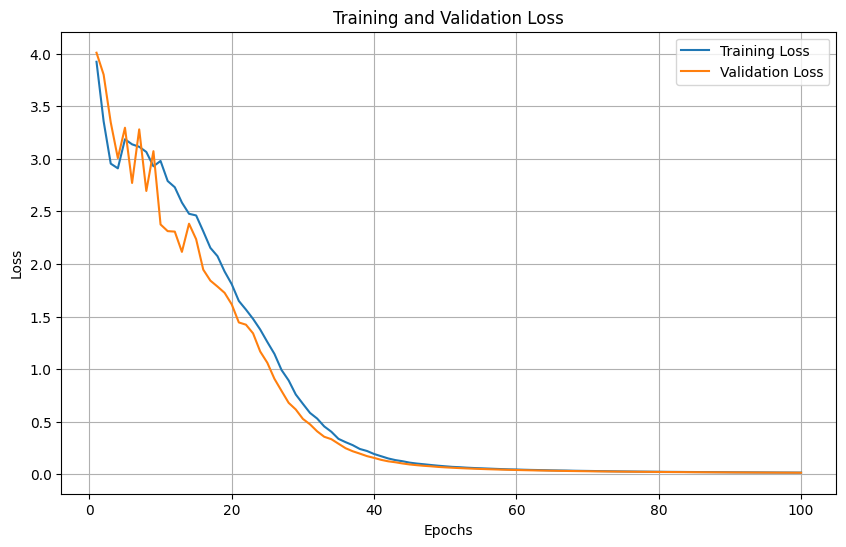


Final Evaluation Results:
Input: J'ai froid, Target: I am cold, Predicted: I am cold
Input: Tu es fatigué, Target: You are tired, Predicted: You are tired
Input: Il a faim, Target: He is hungry, Predicted: He is hungry
Input: Elle est heureuse, Target: She is happy, Predicted: She is happy
Input: Nous sommes amis, Target: We are friends, Predicted: We are friends
Input: Ils sont étudiants, Target: They are students, Predicted: They are students
Input: Le chat dort, Target: The cat is sleeping, Predicted: The cat is sleeping
Input: Le soleil brille, Target: The sun is shining, Predicted: The sun is shining
Input: Nous aimons la musique, Target: We love music, Predicted: We love music
Input: Elle parle français couramment, Target: She speaks French fluently, Predicted: She speaks French fluently
Evaluation Loss: 0.015645529490353593, Accuracy: 1.0


In [18]:
# French to English translation with attention.
class TranslationDataset(Dataset):
    """Custom Dataset class for handling translation pairs."""
    def __init__(self, dataset, word_to_index):
        self.dataset = dataset
        self.word_to_index = word_to_index

    def __len__(self):
        # Returns the total number of translation pairs in the dataset
        return len(self.dataset)

    def __getitem__(self, idx):
        # Retrieves a translation pair by index, converts words to indices,
        # and adds the EOS token at the end of each sentence.
        input_sentence, target_sentence = self.dataset[idx]
        input_indices = [self.word_to_index[word] for word in input_sentence.split()] + [EOS_token]
        target_indices = [self.word_to_index[word] for word in target_sentence.split()] + [EOS_token]
        return torch.tensor(input_indices, dtype=torch.long), torch.tensor(target_indices, dtype=torch.long)

# Creating DataLoaders for training and validation
max_length = 14
translation_dataset = TranslationDataset(french_to_english, word_to_index)

# Use the entire dataset for both training and validation
train_dataloader = DataLoader(translation_dataset, batch_size=1, shuffle=True)
val_dataloader = DataLoader(translation_dataset, batch_size=1, shuffle=False)

class Encoder(nn.Module):
    """The Encoder part of the seq2seq model."""
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)  # GRU layer

    def forward(self, input, hidden):
        # Forward pass for the encoder
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        # Initializes hidden state
        return torch.zeros(1, 1, self.hidden_size, device=device)

class AttentionDecoder(nn.Module):
    """The Decoder part of the seq2seq model with attention mechanism."""
    def __init__(self, hidden_size, output_size, max_length=14, dropout_p=0.1):
        super(AttentionDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length
        self.embedding = nn.Embedding(self.output_size, self.hidden_size)  # Embedding layer
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)  # Attention layer
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)  # Combining layer
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)  # GRU layer
        self.out = nn.Linear(self.hidden_size, output_size)  # Output layer

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        # Calculating attention weights
        attn_weights = torch.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        # Combining embedded input with attention output
        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = torch.relu(output)
        output, hidden = self.gru(output, hidden)

        output = torch.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Assuming all words in the dataset + 'SOS' and 'EOS' tokens are included in word_to_index
input_size = len(word_to_index)
hidden_size = 256  # Adjust according to your preference
output_size = len(word_to_index)

encoder = Encoder(input_size=input_size, hidden_size=hidden_size).to(device)
decoder = AttentionDecoder(hidden_size=hidden_size, output_size=output_size).to(device)

# Set the learning rate for optimization
learning_rate = 0.008

# Initializing optimizers for both encoder and decoder with Adam optimizer
encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=14):
    # Initialize encoder hidden state
    encoder_hidden = encoder.initHidden()

    # Clear gradients for optimizers
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Calculate the length of input and target tensors
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # Initialize loss
    loss = 0

    # Encoding each word in the input
    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)
    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    # Decoder's first input is the SOS token
    decoder_input = torch.tensor([[SOS_token]], device=device)

    # Decoder starts with the encoder's last hidden state
    decoder_hidden = encoder_hidden

    # Decoding loop with attention
    for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
        # Choose top1 word from decoder's output
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()  # Detach from history as input

        # Calculate loss
        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:  # Stop if EOS token is generated
            break

    # Backpropagation
    loss.backward()

    # Update encoder and decoder parameters
    encoder_optimizer.step()
    decoder_optimizer.step()

    # Return average loss
    return loss.item() / target_length

# Negative Log Likelihood Loss function for calculating loss
criterion = nn.NLLLoss()

# Set number of epochs for training
n_epochs = 50

# Lists to store training and validation losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(n_epochs):
    # Training phase
    encoder.train()
    decoder.train()
    total_train_loss = 0
    
    for input_tensor, target_tensor in train_dataloader:
        # Move tensors to the correct device
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)

        # Perform a single training step and update total loss
        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        total_train_loss += loss
    
    # Calculate average training loss for this epoch
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    
    # Validation phase
    encoder.eval()
    decoder.eval()
    total_val_loss = 0
    
    with torch.no_grad():
        for input_tensor, target_tensor in val_dataloader:
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)
            
            # Calculate validation loss
            encoder_hidden = encoder.initHidden()
            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)
            
            # Encoding step
            encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
                encoder_outputs[ei] = encoder_output[0, 0]
            
            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden
            loss = 0
            
            for di in range(target_length):
                decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
                topv, topi = decoder_output.topk(1)
                decoder_input = topi.squeeze().detach()
                
                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break
            
            total_val_loss += loss.item() / target_length
    
    # Calculate average validation loss for this epoch
    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    # Print progress every 10 epochs
    if epoch % 10 == 0 or epoch == n_epochs - 1:
        print(f'Epoch {epoch}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

def evaluate_and_show_examples(encoder, decoder, dataloader, criterion, n_examples=10):
    # Switch model to evaluation mode
    encoder.eval()
    decoder.eval()

    total_loss = 0
    correct_predictions = 0

    # No gradient calculation
    with torch.no_grad():
        for i, (input_tensor, target_tensor) in enumerate(dataloader):
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)

            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            loss = 0

            # Encoding step
            encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
                encoder_outputs[ei] = encoder_output[0, 0]

            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden

            predicted_indices = []

            for di in range(target_length):
                decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()

                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            # Calculate and print loss and accuracy for the evaluation
            total_loss += loss.item() / target_length
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1

            # Optionally, print some examples
            if i < n_examples:
                predicted_sentence = ' '.join([index_to_word[index] for index in predicted_indices if index not in (SOS_token, EOS_token)])
                target_sentence = ' '.join([index_to_word[index.item()] for index in target_tensor if index.item() not in (SOS_token, EOS_token)])
                input_sentence = ' '.join([index_to_word[index.item()] for index in input_tensor if index.item() not in (SOS_token, EOS_token)])

                print(f'Input: {input_sentence}, Target: {target_sentence}, Predicted: {predicted_sentence}')

        # Print overall evaluation results
        average_loss = total_loss / len(dataloader)
        accuracy = correct_predictions / len(dataloader)
        print(f'Evaluation Loss: {average_loss}, Accuracy: {accuracy}')

# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('french2english_attention_loss.png')
plt.show()

# Perform final evaluation with examples and report validation accuracy
print("\nFinal Evaluation Results:")
evaluate_and_show_examples(encoder, decoder, val_dataloader, criterion)